In [1]:
# !ls /kaggle/input/food-101/food-101/food-101/images

In [2]:
# import os
# import matplotlib.pyplot as plt
# from PIL import Image

# def display_images(food_category, num_images=5):
#     dataset_path = "/kaggle/input/food-101/food-101/food-101/"
#     category_path = os.path.join(dataset_path, 'images', food_category)
#     images = os.listdir(category_path)

#     # Display the images
#     plt.figure(figsize=(20, 10))
#     for i in range(min(num_images, len(images))):
#         img_path = os.path.join(category_path, images[i])
#         img = Image.open(img_path)
#         plt.subplot(1, num_images, i+1)
#         plt.imshow(img)
#         plt.axis('off')
#         plt.title(food_category)
#     plt.show()

In [3]:
# display_images('samosa', num_images=5)

In [4]:
# !ls /kaggle/input/food-101/food-101/food-101/meta

In [5]:
# with open("/kaggle/input/food-101/food-101/food-101/README.txt") as f:
#     print(f.read())

In [6]:
# with open("/kaggle/input/food-101/food-101/food-101/license_agreement.txt") as f:
#     print(f.read())

In [7]:
# dirs = os.listdir("/kaggle/input/food-101/food-101/food-101/meta")
# print(dirs)
# with open(f"/kaggle/input/food-101/food-101/food-101/meta/{dirs[0]}") as f:
#     print(f.read(100))

In [8]:
# !ls /kaggle/input/food-101/food-101/food-101/images/apple_pie

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import shutil

import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPool2D

2024-07-16 06:18:17.029952: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 06:18:17.030056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 06:18:17.155006: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
# !ls /kaggle/input/food-101/food-101/food-101/meta/train.txt

In [11]:
Dir = "/kaggle/input/food-101/food-101/food-101/images/"

In [12]:
trainImages = []
trainLabels = []

with open("/kaggle/input/food-101/food-101/food-101/meta/train.txt") as f:
    k = [i.strip() for i in f.readlines()]
    for i in k:
        x = i.split("/")
        if x[0] in ["waffles", "apple_pie", "breakfast_burrito"]:
            trainImages.append(Dir + i + ".jpg")
            trainLabels.append(x[0])

In [13]:
print(len(trainImages))
print(len(trainLabels))

2250
2250


In [14]:
trainIseries = pd.Series(trainImages, name="trainImages")
trainLseries = pd.Series(trainLabels, name="trainLabels")
train_food_data = pd.concat([trainIseries, trainLseries], axis=1)
train_food_df = pd.DataFrame(train_food_data)

In [15]:
train_food_df.head()

,trainImages,trainLabels
0,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
1,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
2,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
3,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
4,/kaggle/input/food-101/food-101/food-101/image...,apple_pie


In [16]:
trainLseries.value_counts()

trainLabels
apple_pie            750
breakfast_burrito    750
waffles              750
Name: count, dtype: int64

In [17]:
train_food_df.shape

(2250, 2)

In [18]:
testImages = []
testLabels = []

with open("/kaggle/input/food-101/food-101/food-101/meta/test.txt") as f:
    k = [i.strip() for i in f.readlines()]
    for i in k:
        x = i.split("/")
        if x[0] in ["waffles", "apple_pie", "breakfast_burrito"]:
            testImages.append(Dir + i + ".jpg")
            testLabels.append(x[0])

In [19]:
print(len(testImages))
print(len(testLabels))

750
750


In [20]:
testIseries = pd.Series(testImages, name="testImages")
testLseries = pd.Series(testLabels, name="testLabels")
test_food_data = pd.concat([testIseries, testLseries], axis=1)
test_food_df = pd.DataFrame(test_food_data)

In [21]:
test_food_df.head()

,testImages,testLabels
0,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
1,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
2,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
3,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
4,/kaggle/input/food-101/food-101/food-101/image...,apple_pie


In [22]:
testLseries.value_counts()

testLabels
apple_pie            250
breakfast_burrito    250
waffles              250
Name: count, dtype: int64

In [23]:
test_food_df.shape

(750, 2)

In [24]:
train_set, val_set = train_test_split(train_food_df, test_size=0.3, random_state=42)

In [25]:
print(train_set.shape)
print(val_set.shape)
print(test_food_df.shape)
print(train_set.shape[0] + val_set.shape[0] + test_food_df.shape[0])

(1575, 2)
(675, 2)
(750, 2)
3000


In [26]:
train_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_gen = ImageDataGenerator(rescale=1.0 / 255)
test_gen = ImageDataGenerator(rescale=1.0 / 255)

train = train_gen.flow_from_dataframe(
    dataframe=train_set,
    x_col="trainImages",
    y_col="trainLabels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
)

val = val_gen.flow_from_dataframe(
    dataframe=val_set,
    x_col="trainImages",
    y_col="trainLabels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
)

test = test_gen.flow_from_dataframe(
    dataframe=test_food_df,
    x_col="testImages",
    y_col="testLabels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
)

Found 1575 validated image filenames belonging to 3 classes.
Found 675 validated image filenames belonging to 3 classes.
Found 750 validated image filenames belonging to 3 classes.


In [27]:
classes = list(train.class_indices.keys())

In [28]:
def show_images(image_gen):
    test_dic = test.class_indices
    classes = list(test_dic.keys())
    images, labels = next(image_gen)
    plt.figure(figsize=(20, 20))
    length = len(labels)
    if length < 25:
        r = length
    else:
        r = 25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image = (images[i] + 1) / 2
        plt.imshow(image)
        index = np.argmax(labels[i])
        class_name = classes[index]
        plt.title(class_name, color="red", fontsize=16)
        plt.axis("off")
    plt.show()

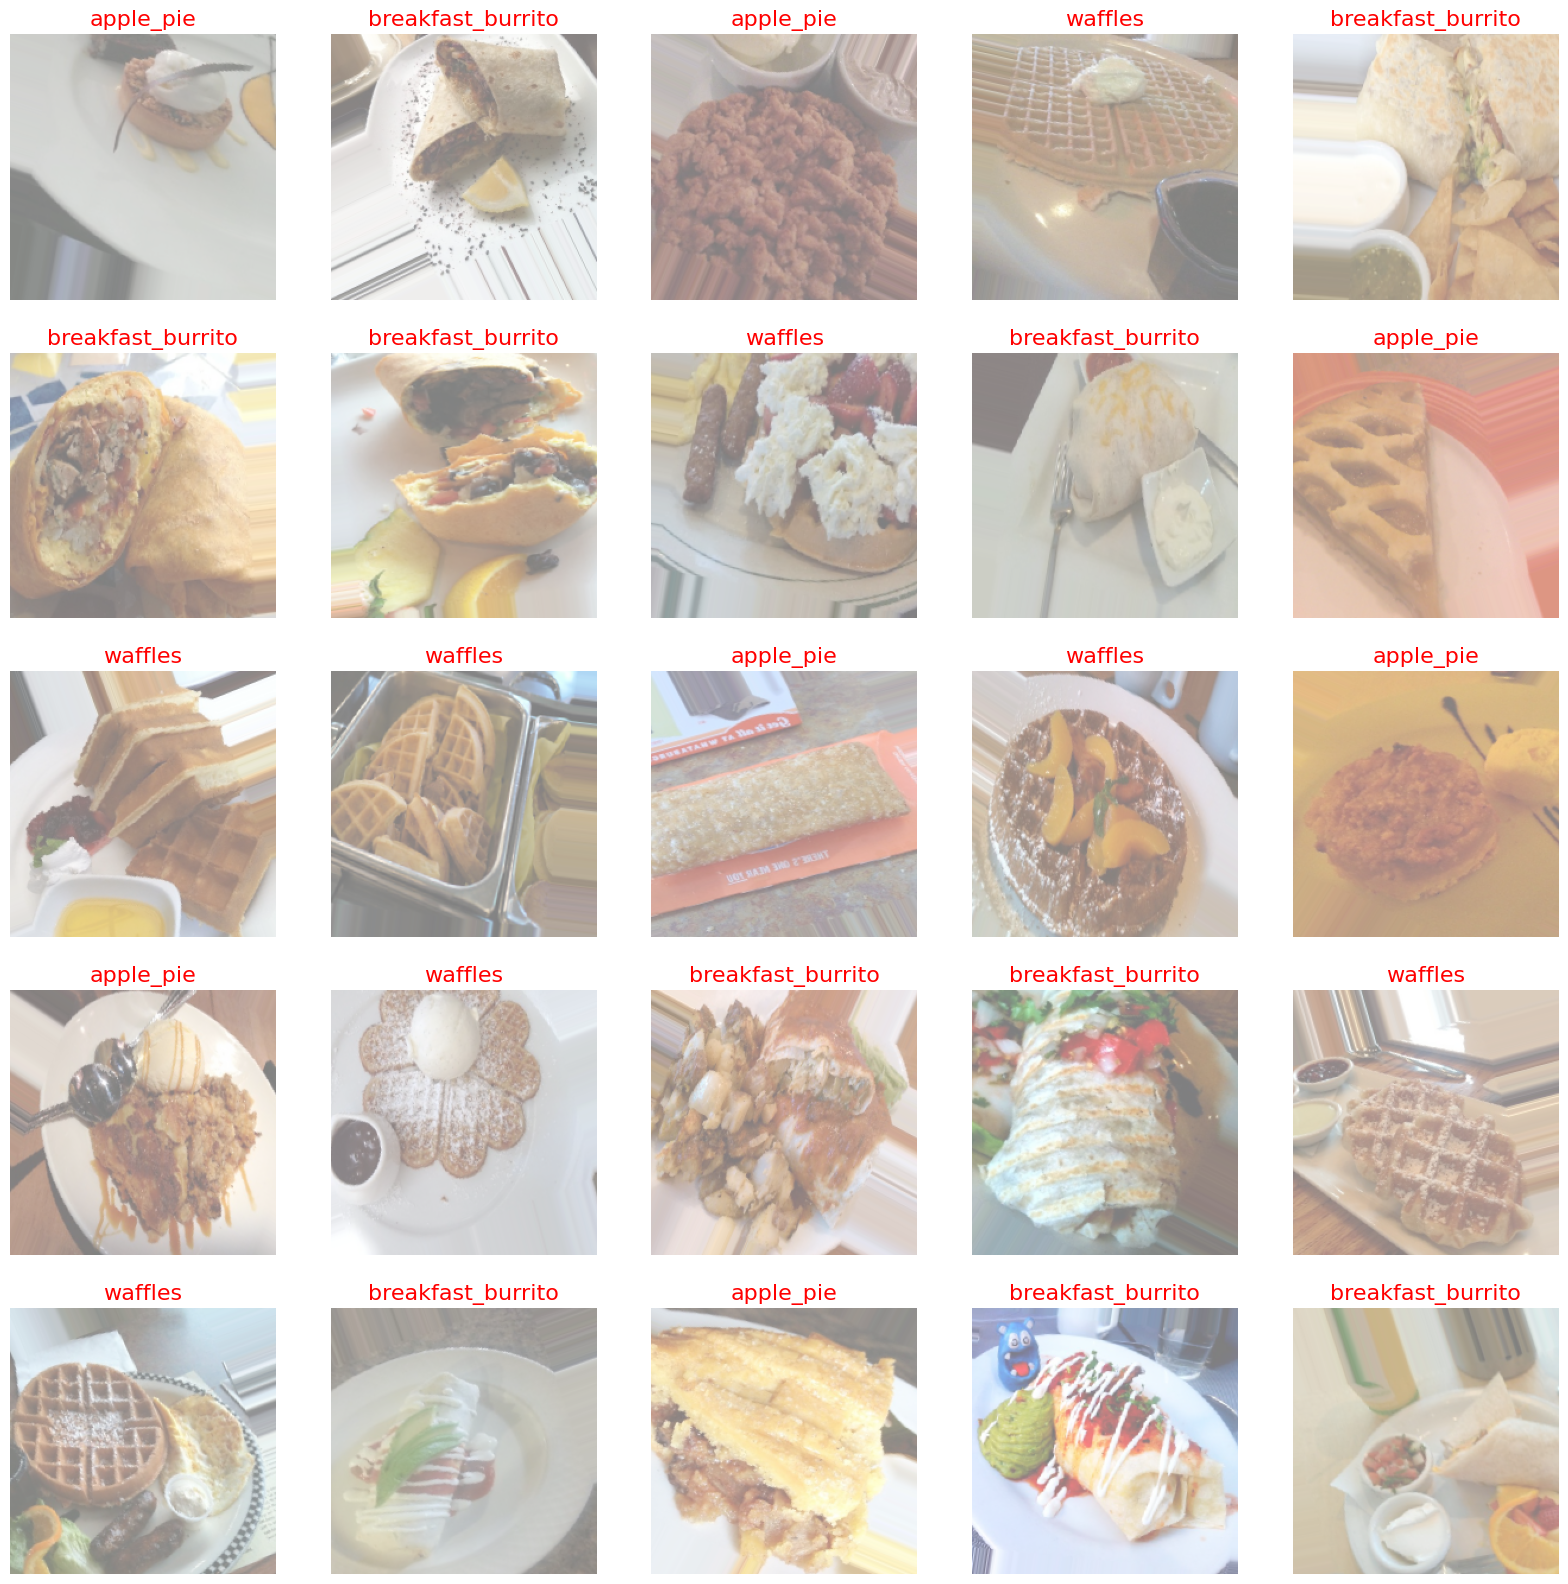

In [29]:
show_images(train)

In [30]:
from tensorflow.keras.applications import InceptionV3

en = InceptionV3(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

en.trainable = False

x = en.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

predictions = Dense(3, activation="softmax")(x)

model = tf.keras.Model(inputs=en.input, outputs=predictions)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [31]:
# Train the model
history = model.fit(
    train,
    validation_data=val,
    epochs=30,
)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/50 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4141 - loss: 1.4293  

I0000 00:00:1721110828.523270      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6817 - loss: 0.8145 - val_accuracy: 0.7763 - val_loss: 0.7027
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 443ms/step - accuracy: 0.8052 - loss: 0.4770 - val_accuracy: 0.8074 - val_loss: 0.5593
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 437ms/step - accuracy: 0.8400 - loss: 0.4483 - val_accuracy: 0.8044 - val_loss: 0.5874
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 450ms/step - accuracy: 0.8361 - loss: 0.4194 - val_accuracy: 0.8563 - val_loss: 0.4346
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 438ms/step - accuracy: 0.8321 - loss: 0.4119 - val_accuracy: 0.8074 - val_loss: 0.4706
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 442ms/step - accuracy: 0.8377 - loss: 0.3911 - val_accuracy: 0.8430 - val_loss: 0.4183
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 441ms/step - accuracy: 0.8438 - loss: 0.3823 - val_accuracy: 0.8415 - val_loss: 0.4003
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 435ms/step - accuracy: 0.8769 - loss: 0.3227 - val_accuracy: 0.8489 -

In [32]:
# Unfreeze some layers of the base model
for layer in en.layers[-20:]:
    layer.trainable = True

# Compile the model again with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)


# Continue training
history_fine = model.fit(
    train,
    validation_data=val,
    epochs=20,
)

model.save("food_101_model.keras")

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 773ms/step - accuracy: 0.8737 - loss: 0.3441 - val_accuracy: 0.8474 - val_loss: 0.3920
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 448ms/step - accuracy: 0.8890 - loss: 0.3200 - val_accuracy: 0.8326 - val_loss: 0.4457
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 440ms/step - accuracy: 0.9168 - loss: 0.2529 - val_accuracy: 0.8519 - val_loss: 0.3918
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 447ms/step - accuracy: 0.9103 - loss: 0.2473 - val_accuracy: 0.8741 - val_loss: 0.3483
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 443ms/step - accuracy: 0.9305 - loss: 0.2145 - val_accuracy: 0.8637 - val_loss: 0.3982
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 451ms/step - accuracy: 0.9224 - loss: 0.2247 - val_accuracy: 0.8681 - val_loss: 0.3631
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 437ms/step - accuracy: 0.9149 - loss: 0.2241 - val_accuracy: 0.8578 - val_loss: 0.3586
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 441ms/step - accuracy: 0.9172 - loss: 0.2112 - val_accu

In [33]:
# # Freeze the base model
# vit.trainable = False

# # Compile and train the model
# model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model with the frozen base
# model.fit(train, epochs=10, validation_data=val)

# # Unfreeze some layers of the base model for fine-tuning
# for layer in vit.layers[-20:]:  # Unfreeze the last 20 layers
#     layer.trainable = True

# # Recompile the model with a lower learning rate
# model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Continue training
# model.fit(train, epochs=10, validation_data=val)

# model.save('food_101_model.keras')

In [34]:
model.evaluate(x=test, verbose=1)

24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 602ms/step - accuracy: 0.8858 - loss: 0.3206


[0.25118258595466614, 0.9079999923706055]

In [35]:
# !ls /

In [36]:
# os.environ['KAGGLE_USERNAME'] = 'ahmadfaraz00710'
# os.environ['KAGGLE_KEY'] = 'd8c6c2d1061066015288fd7a9d1e27d2'

In [37]:
# !kaggle kernels output ahmadfaraz00710/food-101 -p /kaggle/working/

In [38]:
# from keras.models import load_model

# model = load_model("/kaggle/working/food_101_model.keras")

# Food Item Recognition Model - 3 Classes - (Task - 5)


24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 341ms/step


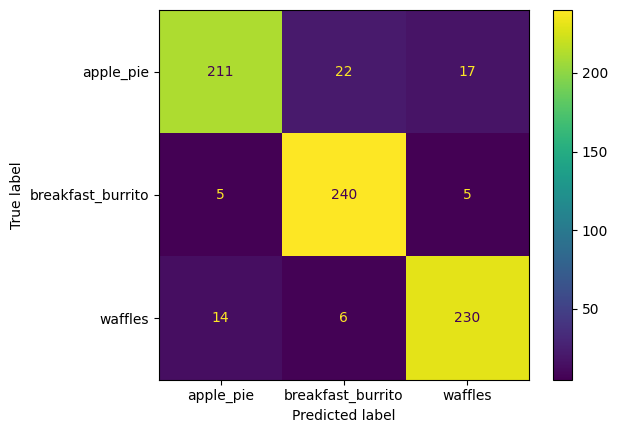

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = model.predict(test)
pred = np.argmax(pred, axis=-1)

cm = confusion_matrix(y_true=test.classes, y_pred=pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot()